This script contains the following:
1. Importing libraries 
2. The elbow technique
3. k-means clustering

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path= r'C:\Users\nehma\OneDrive\Desktop\CF Project'

In [4]:
path

'C:\\Users\\nehma\\OneDrive\\Desktop\\CF Project'

In [5]:
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'merge_all_years1.csv'))  

Taking a look at the Data

In [6]:
df.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [7]:
# Dropping columns 
df = df.drop(['Unnamed: 0'], axis=1, errors='ignore')

In [8]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,Albania,Central and Eastern Europe,2015,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,Algeria,Middle East and Northern Africa,2015,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,Angola,Sub-Saharan Africa,2015,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,Argentina,Latin America and Caribbean,2015,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [9]:
df.shape

(782, 12)

# 2. The Elbow Technique

Preproccessing Data

In [10]:
# Dropping categorical columns 
df = df.drop(['Country','Region', 'Year'], axis=1, errors='ignore')

In [11]:
# checking for missing values
df.isnull().sum()

Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

In [12]:
dups = df.duplicated() #checking for duplicates

In [13]:
dups.shape  #no duplicates

(782,)

In [14]:
df = df.dropna()
#dropping all nan values

In [15]:
# checking for missing values
df.isnull().sum()

Happiness_rank       0
Happiness_score      0
GDP_capita           0
Family               0
Life_expectancy      0
Freedom              0
Gov_trust            0
Generosity           0
Dystopia_residual    0
dtype: int64

In [16]:
df.shape

(470, 9)

In [17]:
from sklearn.preprocessing import StandardScaler

#standardizing my data
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [18]:
df.head()

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600


In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-962577.0345420076,
 -240902.2806538908,
 -107235.09729958723,
 -60455.25498060705,
 -38939.74649904796,
 -27118.28551125261,
 -19909.19928489842,
 -15415.049696575497,
 -12199.948786322802]

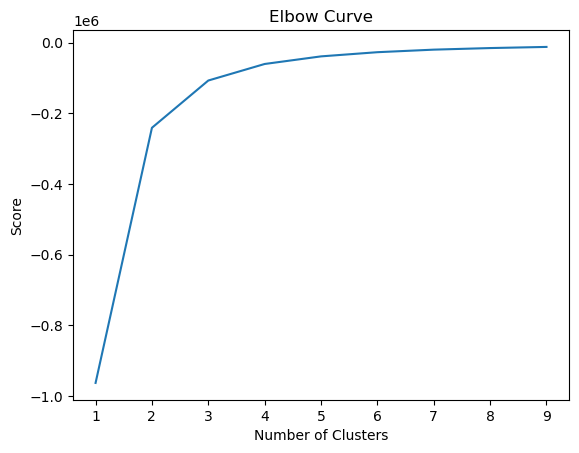

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

3 clusters


# 3. k-mean clustering

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3)

In [24]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nehma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
df.head()

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual,clusters
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,1
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,0
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,0
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,1
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2


In [26]:
df['clusters'].value_counts()

clusters
1    158
0    156
2    156
Name: count, dtype: int64

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


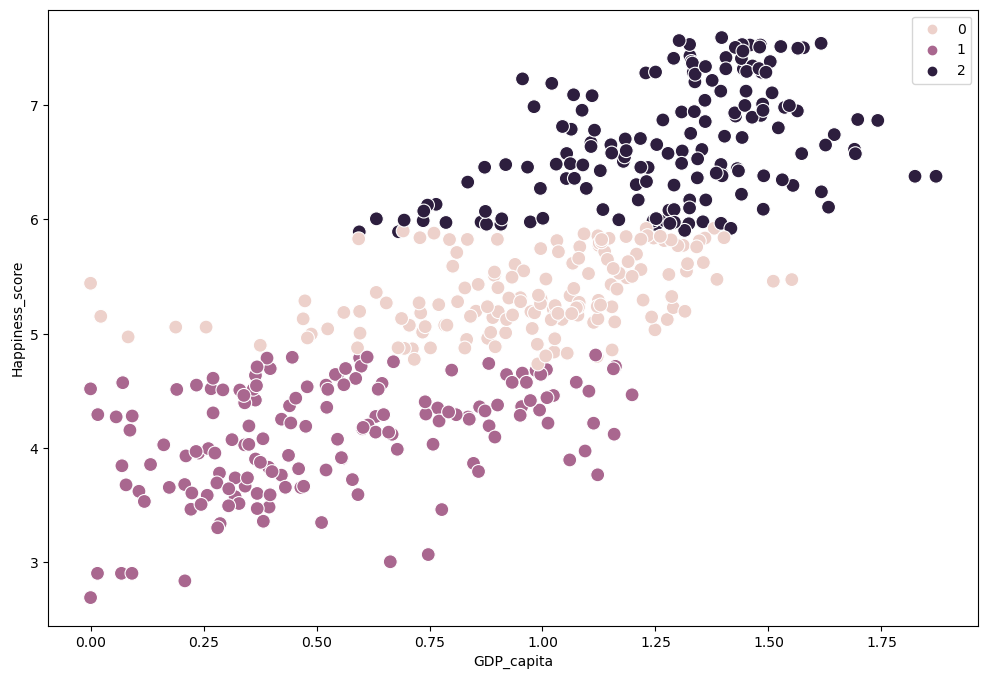

In [38]:
# Plot the clusters for the "Happiness_score" and "	GDP_capita" variables.

plot1 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP_capita'], y=df['Happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP_capita') # Label x-axis.
plt.ylabel('Happiness_score') # Label y-axis.
plt.show()

In [39]:
plot1.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'cluster1.png'))

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


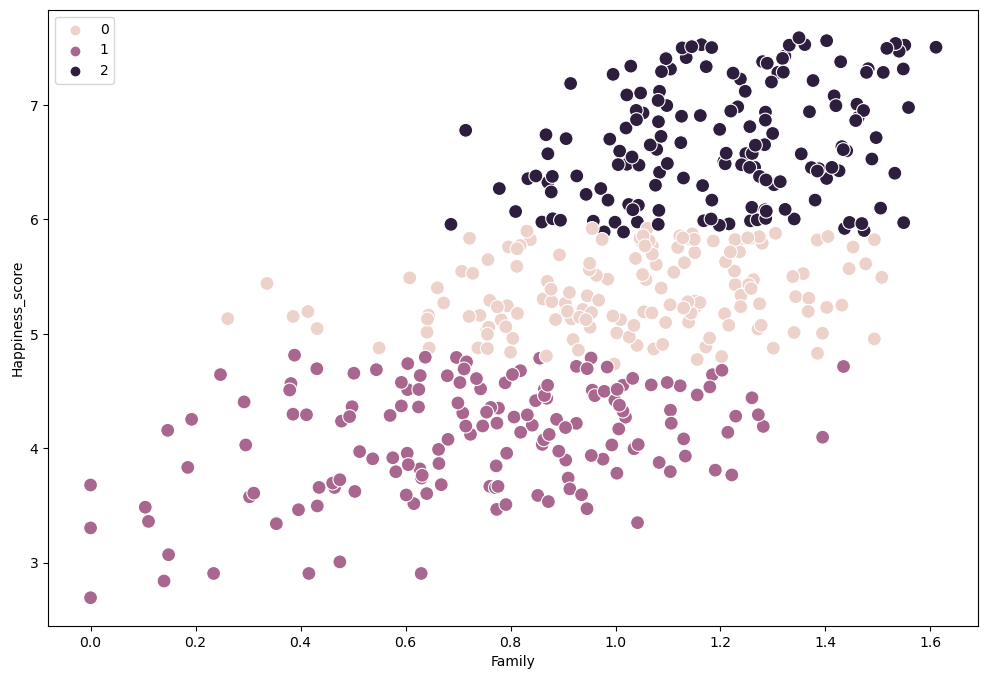

In [40]:
# Plot the clusters for the "Happiness_score" and "Family" variables.

plot2 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Family'], y=df['Happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Family') # Label x-axis.
plt.ylabel('Happiness_score') # Label y-axis.
plt.show()

In [41]:
plot2.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'cluster2.png'))

C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\nehma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


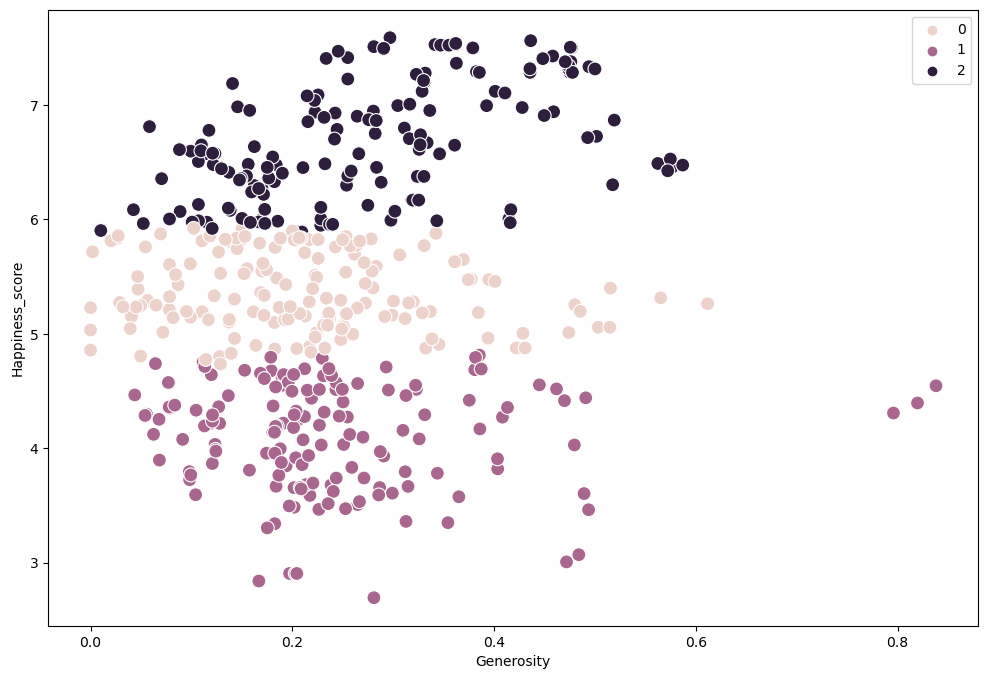

In [43]:
# Plot the clusters for the "Happiness_score" and "	Generosity" variables.

plot3 = plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Generosity'], y=df['Happiness_score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Generosity') # Label x-axis.
plt.ylabel('Happiness_score') # Label y-axis.
plt.show()

In [44]:
plot3.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'cluster3.png'))

In [31]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\nehma\AppData\Local\Temp\ipykernel_47420\4155924145.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [32]:
df.groupby('cluster').agg({'Happiness_score':['mean', 'median'], 
                         'GDP_capita':['mean', 'median'], 
                         'Family':['mean', 'median'],
                         'Generosity':['mean', 'median']})

Happiness_score         GDP_capita              Family           \
                       mean  median       mean    median      mean   median   
cluster                                                                       
dark purple        6.665122  6.5975   1.281647  1.326005  1.205672  1.22178   
pink               5.357891  5.2885   0.973283  1.024765  1.024899  1.05212   
purple             4.105392  4.1935   0.533615  0.468445  0.743631  0.77190   

            Generosity            
                  mean    median  
cluster                           
dark purple   0.276110  0.261320  
pink          0.211619  0.207022  
purple        0.239035  0.212125

In [33]:
df.head()

,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual,clusters,cluster
0,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,1,purple
1,95,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,0,pink
2,68,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,0,pink
3,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,1,purple
4,30,6.574,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600,2,dark purple


In [34]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merge_all_years_clusters.csv'))